<a href="https://colab.research.google.com/github/tavleenbajwa8/ML-Drug-Discovery-Project-/blob/main/DrugDiscoveryProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Computational** Drug Discovery using Bioactivity Data from ChEMBL Database 

In [1]:
#Installing necessary libraries 

! pip install chembl_webresource_client 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
#Drug target search for autism
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [4]:
targets.shape

(24, 9)

In [5]:
# Select the Bioactivity data for acetylcholinesterase 'CHEMBL220' belonging to Homo Sapiens (1st entry)
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

In [6]:
#Selecting the values based on 2 filters: 1. Target_chembl_id 2. Values containing IC50 for the column called standard_type
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
import pandas as pd

In [8]:
#Putting data in a dataframe
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [9]:
df.to_csv('bioactivity_data.csv', index=False)

In [10]:
#Copying files to google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [11]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [12]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

-rw------- 1 root root 4458046 Oct  6 04:49 '/content/gdrive/My Drive/Colab Notebooks/data'


In [13]:
!ls

bioactivity_data.csv  gdrive  sample_data


In [14]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholinesterase,B,,,BAO_0000190,BAO_0000357,single protein format,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,,,CHEMBL1148382,J. Med. Chem.,2004.0,"{'bei': '19.61', 'le': '0.36', 'lle': '3.32', 'sei': '9.21'}",CHEMBL133897,,CHEMBL133897,6.12,0,http://www.openphacts.o

In [15]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,None,23311841,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,1.07
8391,Not Determined,23311842,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,None,None,None,None
8392,None,23311843,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,26.8
8393,Not Determined,23311844,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,None,None,None,None


# 1. **PRE-PROCESSING** 

In [21]:
#Handling missing values 
df.isna().sum()

activity_comment             7073
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      8395
assay_variant_mutation       8395
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles               35
data_validity_comment        7788
data_validity_description    7788
document_chembl_id              0
document_journal              934
document_year                 871
ligand_efficiency            2517
molecule_chembl_id              0
molecule_pref_name           6606
parent_molecule_chembl_id       0
pchembl_value                2415
potential_duplicate             0
qudt_units                   1253
record_id                       0
relation                     1266
src_id                          0
standard_flag                   0
standard_relation            1266
standard_text_

In [22]:
#We will only drop enteries with missing standard_values (1245 records will be dropped)
df1 = df[df.standard_value.notna()]

In [24]:
df1.isna().sum()

activity_comment             7066
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      7129
assay_variant_mutation       7129
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                2
data_validity_comment        6529
data_validity_description    6529
document_chembl_id              0
document_journal               93
document_year                  30
ligand_efficiency            1251
molecule_chembl_id              0
molecule_pref_name           6217
parent_molecule_chembl_id       0
pchembl_value                1149
potential_duplicate             0
qudt_units                      8
record_id                       0
relation                        0
src_id                          0
standard_flag                   0
standard_relation               0
standard_text_

In [26]:
#Label encoding IC50 value to 3 different classes: Active, Inactive, Intermediate
#Active: Less than 1000 nM IC50 units
#Inactive: More than 10,000 nM IC50 units
#Intermediate: B/w 1000 to 10,000 nM IC50 units 

#Lower the IC50 value higher the potency 

In [27]:
bioactivity_class = []
for i in df1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("Inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("Active")
  else:
    bioactivity_class.append("Intermediate")

In [28]:
#Making a list of ChEMBL_ids of target molecules 

mol_cid = []
for i in df1.molecule_chembl_id:
  mol_cid.append(i)

In [29]:
mol_cid

['CHEMBL133897',
 'CHEMBL336398',
 'CHEMBL131588',
 'CHEMBL130628',
 'CHEMBL130478',
 'CHEMBL130112',
 'CHEMBL130098',
 'CHEMBL337486',
 'CHEMBL336538',
 'CHEMBL131051',
 'CHEMBL341437',
 'CHEMBL335033',
 'CHEMBL122983',
 'CHEMBL338720',
 'CHEMBL339995',
 'CHEMBL335158',
 'CHEMBL131536',
 'CHEMBL106126',
 'CHEMBL334971',
 'CHEMBL336625',
 'CHEMBL130666',
 'CHEMBL134061',
 'CHEMBL133388',
 'CHEMBL130645',
 'CHEMBL133580',
 'CHEMBL336524',
 'CHEMBL336276',
 'CHEMBL334395',
 'CHEMBL131320',
 'CHEMBL339297',
 'CHEMBL337714',
 'CHEMBL122575',
 'CHEMBL130704',
 'CHEMBL46151',
 'CHEMBL54126',
 'CHEMBL297316',
 'CHEMBL65667',
 'CHEMBL431519',
 'CHEMBL296429',
 'CHEMBL154972',
 'CHEMBL152722',
 'CHEMBL544022',
 'CHEMBL349127',
 'CHEMBL156659',
 'CHEMBL45118',
 'CHEMBL542609',
 'CHEMBL155322',
 'CHEMBL154211',
 'CHEMBL1203537',
 'CHEMBL86',
 'CHEMBL47375',
 'CHEMBL542360',
 'CHEMBL345849',
 'CHEMBL154689',
 'CHEMBL346733',
 'CHEMBL416464',
 'CHEMBL1203539',
 'CHEMBL347729',
 'CHEMBL296786',
 'CH

In [30]:
len(mol_cid)

7129

In [31]:
#Making a list of canonical structure of target molecules

In [32]:
canonical_struc = []
for i in df1.canonical_smiles:
  canonical_struc.append(i)

In [33]:
canonical_struc

['CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1',
 'O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1',
 'CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1',
 'O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F',
 'CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C',
 'CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1',
 'CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C',
 'CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1',
 'COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1',
 'CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1',
 'CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1',
 'CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C',
 'C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)C(C)(C)C)cc1',
 'CSc1nc(-c2ccc(-c3ccccc3)cc2)nn1C(=O)N(C)C',
 'CSc1nc(/C=C/c2ccccc2)nn1C(=O)N(C)C',
 'CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1',
 'CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1',
 'Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1',
 'CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N(C)c1ccccc1',
 'CCCCCCSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1',
 'CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1',
 'O=C(N1CCOCC1)n1nc(-c2cc

In [34]:
len(canonical_struc)

7129

In [35]:
#Making a list of Standard values

standard_value = []
for i in df1.standard_value:
  standard_value.append(i)

In [36]:
standard_value

['750.0',
 '100.0',
 '50000.0',
 '300.0',
 '800.0',
 '2400.0',
 '100.0',
 '50000.0',
 '800.0',
 '50000.0',
 '50000.0',
 '50.0',
 '100000.0',
 '560.0',
 '10.0',
 '10.0',
 '1400.0',
 '17000.0',
 '1100.0',
 '50000.0',
 '26.0',
 '50000.0',
 '800.0',
 '50000.0',
 '50000.0',
 '56.0',
 '200.0',
 '300.0',
 '200.0',
 '50000.0',
 '500.0',
 '100000.0',
 '50000.0',
 '260000.0',
 '22.0',
 '1000000.0',
 '3800.0',
 '40.0',
 '1000000.0',
 '73.0',
 '3100.0',
 '520000.0',
 '4500.0',
 '1200.0',
 '1000000.0',
 '1000000.0',
 '540.0',
 '30.0',
 '830.0',
 '20000.0',
 '1000000.0',
 '1000000.0',
 '390.0',
 '390.0',
 '430.0',
 '1000000.0',
 '600.0',
 '2000.0',
 '1000000.0',
 '21000.0',
 '290.0',
 '700.0',
 '460000.0',
 '630.0',
 '2100.0',
 '330000.0',
 '340000.0',
 '1000000.0',
 '290.0',
 '210000.0',
 '40.0',
 '80.0',
 '95.0',
 '710000.0',
 '180000.0',
 '20000.0',
 '60.0',
 '70.0',
 '280.0',
 '11000.0',
 '1500.0',
 '650.0',
 '930.0',
 '370.0',
 '4500.0',
 '720000.0',
 '30.0',
 '7600.0',
 '80.0',
 '1000000.0',
 

In [37]:
len(standard_value)

7129

In [39]:
#Combining 4 lists: mol_cid, canonical_struc, bioactivity_class, standard_value into a dataframe4

#1. Make records row wise by forming tuples 
data = list(zip(mol_cid, canonical_struc, standard_value, bioactivity_class))

#2. Add into a dataframe using Pandas
df3 = pd.DataFrame(data, columns=['Chembl_id', 'canonical_struc', 'standard_value', 'bioactivity_class'])
df3

,Chembl_id,canonical_struc,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active
...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,Active
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,1.25,Active
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,3.6,Active
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1.07,Active


In [40]:
#Alternative method

#selection = ['Chembl_id', 'canonical_struc', 'standard_value']
#df3 = df1[selection]
#pd.concat([df3,pd.Series(bioactivity_class)], axis=1)
#df3

In [41]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [42]:
! ls -l

total 4924
-rw-r--r-- 1 root root 4458046 Oct  6 04:49 bioactivity_data.csv
-rw-r--r-- 1 root root  571248 Oct  6 05:20 bioactivity_preprocessed_data.csv
drwx------ 5 root root    4096 Oct  6 04:49 gdrive
drwxr-xr-x 1 root root    4096 Sep 26 13:45 sample_data


In [43]:
#Copying to Google drive

! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [44]:
! ls

bioactivity_data.csv  bioactivity_preprocessed_data.csv  gdrive  sample_data


## 2. **Exploratory Data Analysis**

Compute Molecular descriptors and perform EDA on computed descriptors. 

In [45]:
#Installing conda and rdkit 
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y

--2022-10-06 05:21:52--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  23.3MB/s    in 3.9s    

2022-10-06 05:21:56 (20.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [46]:
! conda list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
asn1crypto                1.3.0                    py37_0  
blas                      1.0                         mkl  
bottleneck                1.3.4            py37hce1f21e_0  
bzip2                     1.0.8                h7b6447c_0  
ca-certificates           2022.07.19           h06a4308_0  
cairo                     1.16.0               h19f5f5c_2  
certifi                   2022.9.14        py37h06a4308_0  
cffi                      1.14.0           py37h2e261b9_0  
chardet                   3.0.4                 py37_1003  
conda                     22.9.0           py37h06a4308_0  
conda-package-handling    1.6.0            py37h7b6447c_0  
cryptography              2.8              py37h1ba5d50_0  
fontconfig                2.13.1               h6c09931_0  
freetype                  2.11.0               h70

In [51]:
! conda create -c rdkit -n my-rdkit-env rdkit -y


Solving environment: / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local/envs/my-rdkit-env

  added / updated specs:
    - rdkit


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main None
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu None
  blas               pkgs/main/linux-64::blas-1.0-mkl None
  bottleneck         pkgs/main/linux-64::bottleneck-1.3.5-py37h7deecbd_0 None
  bzip2              pkgs/main/linux-64::bzip2-1.0.8-h7b6447c_0 None
  ca-certificates    pkgs/main/linux-64::ca-certificates-2022.07.19-h06a4308_0 None
  cairo              pkgs/main/linux-64::cairo-1.16.0-h19f5f5c_2 None
  certifi            pkgs/main/linux-64::certifi-2022.9.14-py37h06a4308_0 None
  fontconfig         pkgs/main/linux-64::fontconfig-2.13.1-h6c09931_0 None
  freetype           pkgs/main/linux-64::freetype-2.11.0-h70c0345_0 None
  giflib             pkgs/main/linux-64::giflib-5.2

In [52]:
#Activating rdkit environment
! conda activate my-rdkit-env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [53]:
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("bioactivity_preprocessed_data.csv")

In [56]:
#Calculating Lipinski descriptors 
#5 Lipinski's Rule 

"""The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 1 """


"The Lipinski's Rule stated the following:\n\nMolecular weight < 500 Dalton\nOctanol-water partition coefficient (LogP) < 5\nHydrogen bond donors < 5\nHydrogen bond acceptors < 1 "

In [57]:
! pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 26 kB/s 


In [58]:
! conda install -c rdkit rdkit

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.

Retrieving notices: ...working... done


In [59]:
#This code solved the env related issue
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-06 05:33:36--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-10-06 05:33:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   175MB/s    in 0.5s    

2022-10-06 05:33:37 (175 MB/s) - ‘Minicon

In [80]:
#Importing necessary libraries 

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem.Descriptors import ExactMolWt

#rdkit helps us compute molecule descriptors for the compounds that we collected in preprocessed bioactivity dataset 
#The preprocessed bioactivity datasets consists of molecule names and corresponding smile notations(info about chemical structures) which wil be used to compute molecular descriptors 


In [ ]:
#

**Lipinski's rule** of five, also known as rule of five (RO5), is a rule of thumb to **evaluate druglikeness or determine if a chemical compound** with a certain pharmacological or biological activity has chemical properties and physical properties that would make it a likely orally active drug in humans. 

The druglikeness is based on **Absorption, Distribution, Metabolism and Excretion (ADME) **that is the Pharmaco-kinetic profile of the orally administered drug.

In order to validate his results Lipinski collected a set of FDA approved orally administered drugs and based on his analysis he observed that the 4 **descriptors used for his analysis has corresponding values in multiples of 5** as follows:

1. Molecular weight < 500 Daltons
2. Octanol-water partition coefficient (LogP) < 5
3. Hydrogen bond donors < 5
4. Hydrogen bond acceptors < 10


**Molecular descriptors** can be defined as mathematical representations of molecules’ properties that are generated by algorithms. 

The **numerical values** of molecular descriptors are used to quantitatively describe the** physical and chemical information of the molecules**. 

An example of molecular descriptors is the **LogP** which is a quantitative representation of the **lipophilicity** of the molecules, it is obtained by measuring the *partitioning of the molecule between an aqueous phase and a lipophilic phase* which consists usually of water/n-octanol.

In [112]:
#Function to calculate descriptors

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [113]:
df

,Chembl_id,canonical_struc,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,Active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,Active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,Inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,Active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,Active
...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,Active
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,1.25,Active
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,3.60,Active
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1.07,Active


In [114]:
 df2 = df[df.canonical_struc.notna()] 

In [115]:
df2

,Chembl_id,canonical_struc,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,Active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,Active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,Inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,Active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,Active
...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,Active
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,1.25,Active
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,3.60,Active
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1.07,Active


In [117]:
df_lipinski = lipinski(df2.canonical_struc)

In [118]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
7122,547.143,7.0315,3.0,4.0
7123,561.170,7.7468,2.0,5.0
7124,692.256,8.6434,4.0,7.0
7125,284.790,4.4664,1.0,2.0


In [119]:
#Combining with Previous Dataframe of chembl_id, canonical_struc, standard_value, bioactivity_class

df_combined = pd.concat([df3, df_lipinski], axis=1)

In [120]:
df_combined

,Chembl_id,canonical_struc,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,Active,692.256,8.6434,4.0,7.0
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,1.25,Active,284.790,4.4664,1.0,2.0
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,3.6,Active,379.500,4.3611,0.0,4.0
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1.07,Active,NaN,NaN,NaN,NaN


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

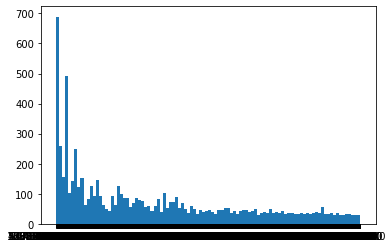

In [124]:
plt.hist(df_combined['standard_value'], bins=100)
plt.show()

In [125]:
#Convert IC50 to pIC50

# ---> Negative logarithmic transformation to make IC50 values make the dataset more uniformly distributed.

#Steps:

#Normalize the values of Standard_value column 
#Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
#Take the molar value and apply -log10
#Delete the standard_value column and create a new pIC50 column

In [126]:
#Normalization 
def norm_value(input):
    norm = []

    for i in input['standard_value'].astype('float'):
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

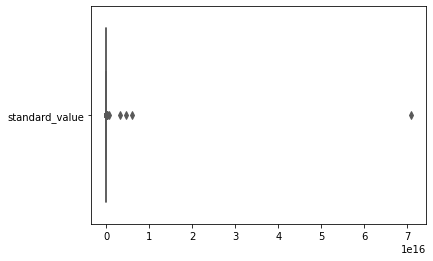

In [127]:
import seaborn as sns
a=df[['standard_value']]
sns.boxplot(data=a, orient="h", palette="Set2")

In [128]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,Chembl_id,canonical_struc,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,Active,692.256,8.6434,4.0,7.0,0.63
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,Active,284.790,4.4664,1.0,2.0,1.25
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,Active,379.500,4.3611,0.0,4.0,3.60
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,Active,NaN,NaN,NaN,NaN,1.07


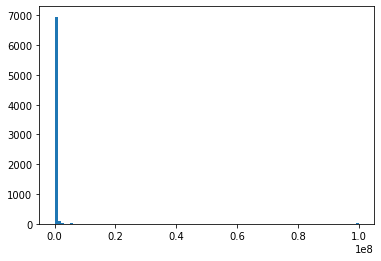

In [129]:
plt.hist(df_combined['standard_value_norm'], bins=100)
plt.show()

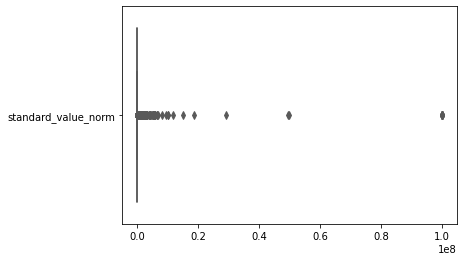

In [130]:
b=df_combined[['standard_value_norm']]
sns.boxplot(data=b, orient="h", palette="Set2")

In [131]:
df_combined['standard_value_norm'].describe()

count    7.129000e+03
mean     2.552793e+05
std      4.058964e+06
min      0.000000e+00
25%      9.120000e+01
50%      1.300000e+03
75%      1.202264e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [132]:
#Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10**-9

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [133]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,Chembl_id,canonical_struc,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,Active,692.256,8.6434,4.0,7.0,9.200659
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,Active,284.790,4.4664,1.0,2.0,8.903090
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,Active,379.500,4.3611,0.0,4.0,8.443697
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,Active,NaN,NaN,NaN,NaN,8.970616


In [134]:
df_final.pIC50.describe()

count    7129.000000
mean             inf
std              NaN
min         1.000000
25%         4.920000
50%         5.886057
75%         7.040005
max              inf
Name: pIC50, dtype: float64

In [135]:
#Removing "Intermediate" Bioactivity class because we want to do the binary classification between Active and Inactive classes only
#Class intermediate was overlapping between active and inactive which will lead to incorrect prediction

In [136]:
df_2class = df_final[df_final.bioactivity_class != 'Intermediate']
df_2class

,Chembl_id,canonical_struc,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7124,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,Active,692.256,8.6434,4.0,7.0,9.200659
7125,CHEMBL4872514,COc1cc(CNC(=O)CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CC...,Active,284.790,4.4664,1.0,2.0,8.903090
7126,CHEMBL3304306,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,Active,379.500,4.3611,0.0,4.0,8.443697
7127,CHEMBL140476,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,Active,NaN,NaN,NaN,NaN,8.970616


In [137]:
#Exploratory Data Analysis via Lipinski Descriptors

In [138]:
#Import Data visualization libraries

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

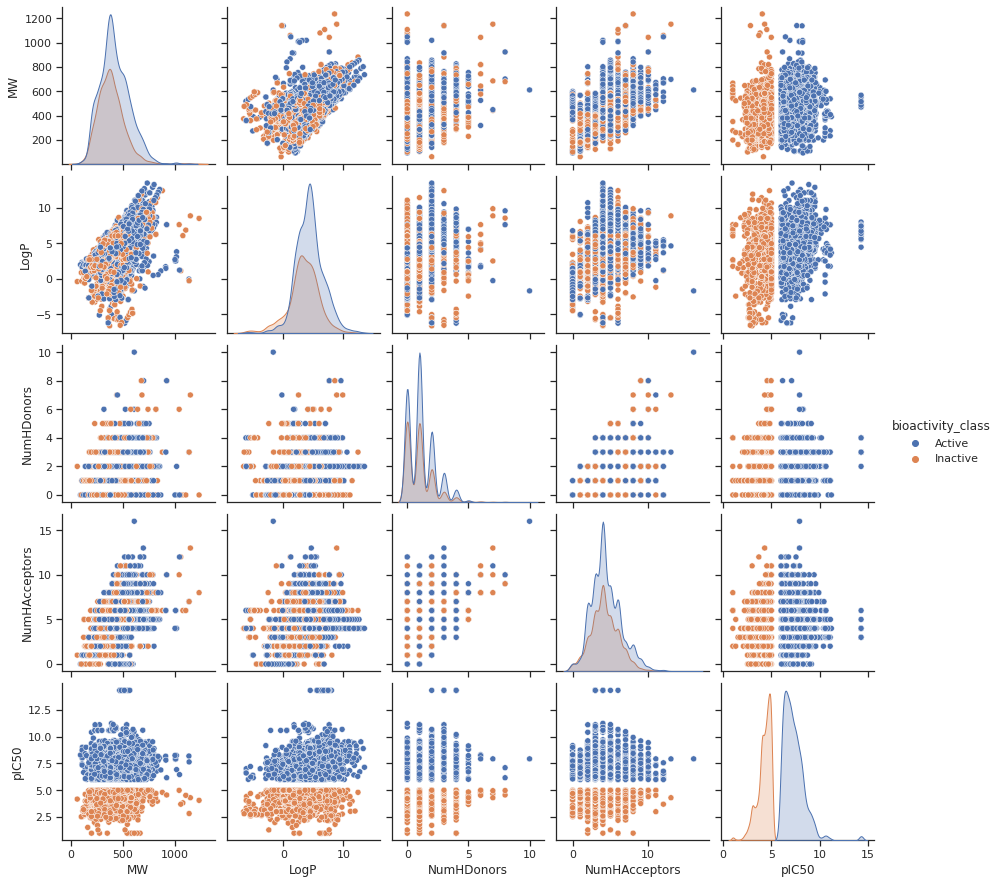

In [139]:
sns.pairplot(df_2class, hue='bioactivity_class')

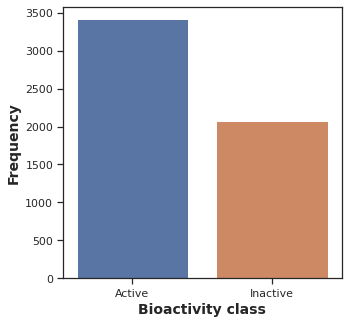

In [140]:
#Frequency plot Active and Inactive Bioactivity class

plt.figure(figsize=(5, 5))

sns.countplot(x='bioactivity_class', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [ ]:
#Molecular Weight vs LogP

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

#Shows that chemical spaces are shared by Active and Inactive Bioactivity classes

In [144]:
#Performing Wilcoxon Rank sum/Mann Whitney U-test

These tests are non-parametric equivalent of two sample independent t-test.

We will describe two such tests which are closely related:

1. Wilcoxon rank sum test for unpaired samples

2. Mann-Whitney U test for two unpaired samples

These tests are based purely on the order in which observations from the two samples fall. They test is used for two comparing two continuous variables that may not follow Gussian distribution.

They test the null hypothesis that the two data samples X and Y come from the same population against an alternative that observations in one sample tend to be larger than the observations in the other.

The basic assumptions for the tests are:

(i) The two distributions X and Y are continuous and need not be Gaussian.

(ii) The observations are ordinal.

(iii) The two distributions X and Y have the same shape. Any difference between them is due to the shift in one distribution with respect to the other, which changes only their median, and not the shape.

Thus these tests detect the shift in the two distributions under the assumptions that their shapes are same.

Because of this, we can construct the null hypothesis for testing two distributions X and Y in many ways like

"Null hypothesis that X=Y against an alternatives X>Y, X<Y and X≠Y"

"Null hypothesis that median of X equals median of Y against alternative hypothesis on their inequalities"

In [145]:
#The two samples are combined and rank ordered together. The strategy is to 
#determine if the values from the two samples are randomly mixed in the rank ordering 
#or if they are clustered at opposite ends when combined. 
#A random rank order would mean that the two samples are not different,
#while a cluster of one sample values would indicate a difference between them.

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

In [146]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'Active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'Inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [150]:
df_2class.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [155]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,7060039.0,0.0,0.05,Different distribution (reject H0)


In [156]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4081749.5,2.576722e-22,0.05,Different distribution (reject H0)


In [157]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4289874.0,7.797672e-41,0.05,Different distribution (reject H0)


In [158]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3901175.5,5.494016e-12,0.05,Different distribution (reject H0)


In [159]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3665199.0,0.015572,0.05,Different distribution (reject H0)


***Interpretation:***



Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) all 4 descriptors shows statistically significant difference between actives and inactives.

In [160]:
#Visualizations

In [161]:
#pIC50 value distribution wrt Bioactivity class.

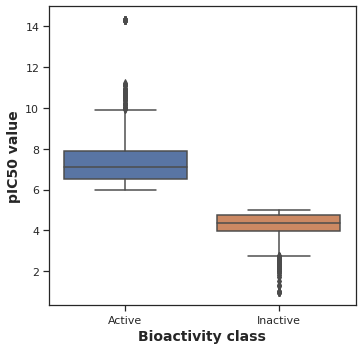

In [162]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [163]:
#MW value distribution wrt Bioactivity class.

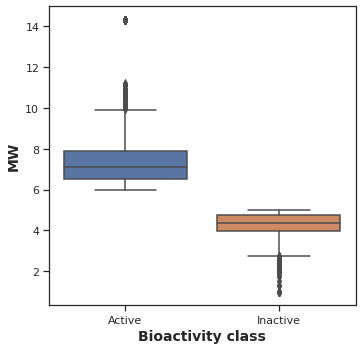

In [164]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data = df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [165]:
##LogP value distribution wrt Bioactivity class.

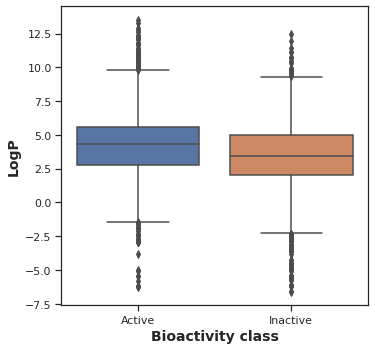

In [166]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [167]:
##NumHDonors distribution wrt Bioactivity class.

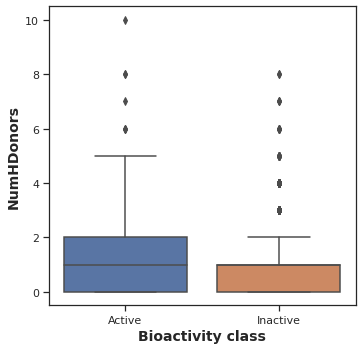

In [168]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [169]:
##NumHAcceptors value distribution wrt Bioactivity class.

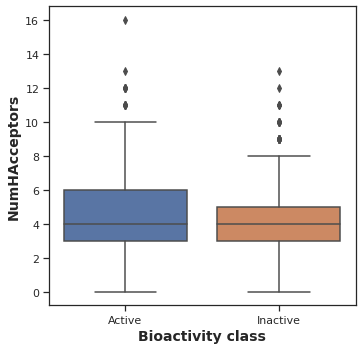

In [170]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [171]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: bioactivity_data.csv (deflated 91%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
